In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as st
import statsmodels.tsa as ts

from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline
plt.style.use("ggplot")
sns.set_context("talk")

In [64]:
canada_df = pd.read_csv("data/MFx_Module5-Part I_VAR_Workfile_CAN.csv")

In [16]:
data = canada[:-8]
data.head()

,dateid01,dateid,cpi,gdp,infl,lgdp,lgdp_gap,mpr,rer,rer_gap
0,1/1/93,00:00.0,85.1,729128,2.173913,13.499605,-0.002062,5.98,97.41,4.104962
1,4/1/93,00:00.0,85.4,739668,1.706485,13.513957,0.000188,4.54,95.27,2.521101
2,7/1/93,00:00.0,85.7,744268,1.698754,13.520156,-0.005713,4.23,93.41,1.214675
3,10/1/93,00:00.0,86.1,753308,1.918736,13.532229,-0.005739,4.27,92.41,0.761541
4,1/1/94,00:00.0,85.5,766924,0.470035,13.550143,0.000084,3.84,91.54,0.426801


In [17]:
data.loc[:, ["lgdp_gap", "rer_gap", "infl", "mpr"]]

,lgdp_gap,rer_gap,infl,mpr
0,-0.002062,4.104962,2.173913,5.98
1,0.000188,2.521101,1.706485,4.54
2,-0.005713,1.214675,1.698754,4.23
3,-0.005739,0.761541,1.918736,4.27
4,0.000084,0.426801,0.470035,3.84
5,0.002074,-2.844924,-0.117096,5.66
6,0.013102,-3.139275,0.116686,5.32
7,0.013229,-2.570118,0.000000,5.19
8,0.017278,-4.359357,1.637427,7.50
9,0.011094,-3.967287,2.696366,7.73


In [30]:
model = ts.vector_ar.var_model.VAR(data.loc[:, ["lgdp_gap", "rer_gap", "infl", "mpr"]]).fit(maxlags=4)
model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 13, Nov, 2019
Time:                     15:25:56
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -7.65164
Nobs:                     76.0000    HQIC:                  -8.90361
Log likelihood:           6.65009    FPE:                6.09009e-05
AIC:                     -9.73704    Det(Omega_mle):     2.71610e-05
--------------------------------------------------------------------
Results for equation lgdp_gap
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.000868         0.005216           -0.166           0.868
L1.lgdp_gap         1.392056         0.150645            9.241           0.000
L1.rer_gap          0.000514         0.000436            1.181   

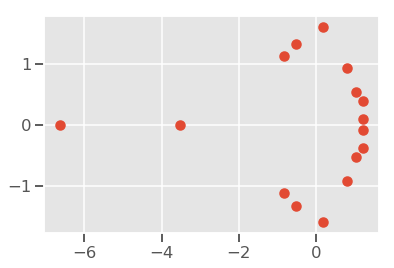

In [31]:
plt.scatter(np.real(model.roots), np.imag(model.roots))

In [32]:
model.is_stable()

True

In [33]:
model = ts.vector_ar.var_model.VAR(data.loc[:, ["lgdp_gap", "rer", "infl", "mpr"]]).fit(maxlags=4)
model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 13, Nov, 2019
Time:                     15:26:09
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -7.71782
Nobs:                     76.0000    HQIC:                  -8.96979
Log likelihood:           9.16463    FPE:                5.70014e-05
AIC:                     -9.80321    Det(Omega_mle):     2.54219e-05
--------------------------------------------------------------------
Results for equation lgdp_gap
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.023592         0.020499           -1.151           0.250
L1.lgdp_gap         1.366222         0.143176            9.542           0.000
L1.rer              0.000435         0.000386            1.126   

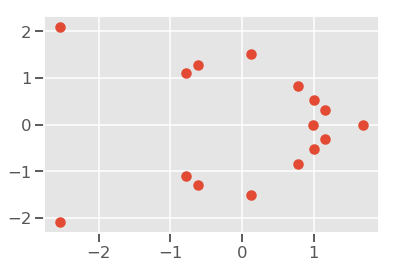

In [34]:
plt.scatter(np.real(model.roots), np.imag(model.roots))

In [35]:
model.is_stable()

False

In [38]:
model = ts.vector_ar.var_model.VAR(data.loc[:, ["lgdp_gap", "rer_gap", "infl", "mpr"]])
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(maxlags=i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -9.571897852463927
BIC :  -8.972037636649492
FPE :  6.97062799996359e-05
HQIC:  -9.33157549723616 

Lag Order = 2
AIC :  -9.934252620013538
BIC :  -8.846540853849111
FPE :  4.868580314711994e-05
HQIC:  -9.498821620583099 

Lag Order = 3
AIC :  -9.818498581673413
BIC :  -8.23566894613586
FPE :  5.515067436863714e-05
HQIC:  -9.185380632573455 

Lag Order = 4
AIC :  -9.73703698482845
BIC :  -7.651643996151205
FPE :  6.0900908098825645e-05
HQIC:  -8.903613075822424 

Lag Order = 5
AIC :  -9.92318245262019
BIC :  -7.327595765459524
FPE :  5.213229826313605e-05
HQIC:  -8.886793190022363 

Lag Order = 6
AIC :  -10.00014492553198
BIC :  -6.886543448229049
FPE :  5.0696716126829024e-05
HQIC:  -8.758091015718884 

Lag Order = 7
AIC :  -10.50268709018376
BIC :  -6.863052909728784
FPE :  3.304512307769695e-05
HQIC:  -9.052230008727708 

Lag Order = 8
AIC :  -10.825277180455492
BIC :  -6.651389295592723
FPE :  2.6713298884207792e-05
HQIC:  -9.16364005347436 

Lag Order = 9
AIC 

In [44]:
canada2 = ts.vector_ar.var_model.VAR(data.loc[:, ["lgdp_gap", "rer", "infl", "mpr"]]).fit(maxlags=1)
canada2.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 13, Nov, 2019
Time:                     16:00:52
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -8.68409
Nobs:                     79.0000    HQIC:                  -9.04363
Log likelihood:          -61.6686    FPE:                9.29664e-05
AIC:                     -9.28395    Det(Omega_mle):     7.27306e-05
--------------------------------------------------------------------
Results for equation lgdp_gap
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.015670         0.017364           -0.902           0.367
L1.lgdp_gap         0.835863         0.099787            8.376           0.000
L1.rer              0.000177         0.000134            1.317   

In [45]:
canada = ts.vector_ar.var_model.VAR(data.loc[:, ["lgdp_gap", "rer_gap", "infl", "mpr"]]).fit(maxlags=2)
canada.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 13, Nov, 2019
Time:                     16:01:04
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -8.65122
Nobs:                     78.0000    HQIC:                  -9.30350
Log likelihood:          -26.8907    FPE:                5.91877e-05
AIC:                     -9.73893    Det(Omega_mle):     3.82413e-05
--------------------------------------------------------------------
Results for equation lgdp_gap
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.029236         0.015363           -1.903           0.057
L1.lgdp_gap         1.349851         0.111345           12.123           0.000
L1.rer              0.000284         0.000357            0.797   

In [46]:
canada2.acorr()

array([[[ 1.        ,  0.30398701,  0.5198238 ,  0.25013831],
        [ 0.30398701,  1.        ,  0.0587533 , -0.67669304],
        [ 0.5198238 ,  0.0587533 ,  1.        ,  0.05236365],
        [ 0.25013831, -0.67669304,  0.05236365,  1.        ]],

       [[ 0.84208782,  0.33378491,  0.324912  ,  0.19614075],
        [ 0.24130711,  0.98471082,  0.04973576, -0.69993619],
        [ 0.49061602,  0.05116021,  0.69266698,  0.05551221],
        [ 0.25624817, -0.65737073, -0.01383073,  0.95149322]]])

In [47]:
canada.acorr()

array([[[ 1.        ,  0.06264837,  0.51916709,  0.30703629],
        [ 0.06264837,  1.        , -0.10578426, -0.83101931],
        [ 0.51916709, -0.10578426,  1.        ,  0.15196358],
        [ 0.30703629, -0.83101931,  0.15196358,  1.        ]],

       [[ 0.82934629,  0.01803262,  0.48636662,  0.30600874],
        [ 0.08170693,  0.9917775 , -0.11344458, -0.82275   ],
        [ 0.32347976, -0.10946771,  0.70058147,  0.10643807],
        [ 0.27262877, -0.84069633,  0.15601243,  0.9774901 ]],

       [[ 0.52978647, -0.01825115,  0.35268387,  0.27754505],
        [ 0.04029195,  0.98058268, -0.12699849, -0.83116934],
        [ 0.12609404, -0.15828176,  0.45887543,  0.10596245],
        [ 0.24829473, -0.85098349,  0.13270405,  0.95485583]]])

In [49]:
canada8 = ts.vector_ar.var_model.VAR(data.loc[:, ["lgdp_gap", "rer", "infl", "mpr"]]).fit(maxlags=8)
canada8.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 13, Nov, 2019
Time:                     16:11:32
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -6.63213
Nobs:                     72.0000    HQIC:                  -9.14438
Log likelihood:           112.362    FPE:                2.72327e-05
AIC:                     -10.8060    Det(Omega_mle):     6.02093e-06
--------------------------------------------------------------------
Results for equation lgdp_gap
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.033634         0.057067           -0.589           0.556
L1.lgdp_gap         1.585350         0.228678            6.933           0.000
L1.rer              0.000113         0.000445            0.255   

In [52]:
canada8.resid_acorr()

array([[[ 1.        ,  0.29632815,  0.68355658,  0.26773463],
        [ 0.29632815,  1.        ,  0.13106176,  0.10252948],
        [ 0.68355658,  0.13106176,  1.        , -0.08611884],
        [ 0.26773463,  0.10252948, -0.08611884,  1.        ]],

       [[-0.02473493, -0.0152433 ,  0.00608357,  0.06768363],
        [ 0.01812038,  0.08954507,  0.06616816,  0.02438444],
        [-0.03620873,  0.00911126,  0.01469146,  0.01215058],
        [-0.0233833 , -0.12531555,  0.04359193,  0.06033673]]])

In [89]:
canada = ts.vector_ar.var_model.VAR(data.loc[:, ["lgdp_gap", "rer_gap", "infl", "mpr"]]).fit(maxlags=2)
canada.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 13, Nov, 2019
Time:                     16:54:12
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -8.84654
Nobs:                     78.0000    HQIC:                  -9.49882
Log likelihood:          -19.2730    FPE:                4.86858e-05
AIC:                     -9.93425    Det(Omega_mle):     3.14560e-05
--------------------------------------------------------------------
Results for equation lgdp_gap
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.001652         0.004171           -0.396           0.692
L1.lgdp_gap         1.291054         0.128466           10.050           0.000
L1.rer_gap          0.000503         0.000402            1.249   

In [90]:
interval = canada.forecast_interval(canada.endog[-canada.k_ar:], steps=8)

In [92]:
mid = pd.DataFrame(interval[0], index=range(80, 88), columns=["lgdp_gap", "rer_gap", "infl", "mpr"])
up = pd.DataFrame(interval[1], index=range(80, 88), columns=["lgdp_gap", "rer_gap", "infl", "mpr"])
low = pd.DataFrame(interval[2], index=range(80, 88), columns=["lgdp_gap", "rer_gap", "infl", "mpr"])

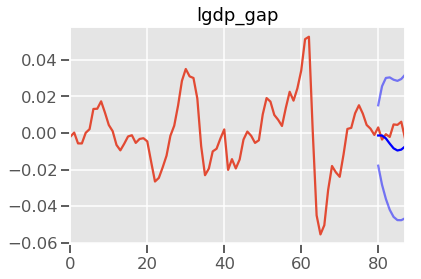

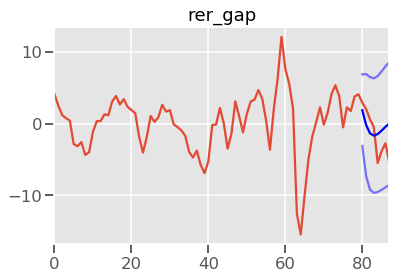

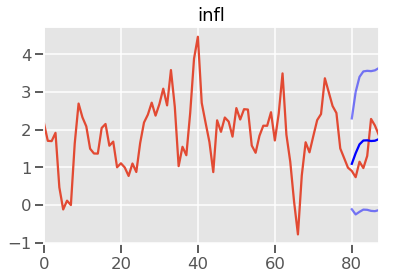

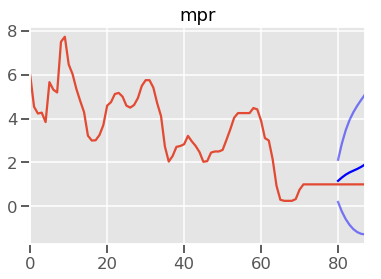

In [95]:
for i in ["lgdp_gap", "rer_gap", "infl", "mpr"]:
    canada_df.loc[:, i].plot()
    mid[i].plot(c="blue")
    up[i].plot(c="blue", alpha=0.5)
    low[i].plot(c="blue", alpha=0.5)
    plt.title(i)
    plt.show()

In [96]:
mid.infl

80    1.095307
81    1.377683
82    1.612900
83    1.714723
84    1.719820
85    1.701378
86    1.708491
87    1.751153
Name: infl, dtype: float64